# A small 1D pic without Poisson
To try out the fake R model

In [183]:
#import
import numpy as np
import scipy as sp
import astropy
from imp import reload

import matplotlib.pyplot as plt
%matplotlib inline

import pic

from pic.plasma import plasma
from pic.particles import particles

from pic.functions import generate_maxw, velocity_maxw_flux, max_vect, fux_vect, numba_return_density, smooth
from pic.constantes import (me, q,kb,eps_0,mi)

reload(pic)
reload(pic.plasma)
reload(pic.particles)
reload(pic.functions)
reload(pic.constantes)

from ipywidgets import IntProgress as prog
from IPython.display import display
%load_ext snakeviz

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz


In [184]:
#parameters
Lx = 1e-2 #System length
dX = 1e-5 #dX in m
Nx = int(Lx/dX)+1 #cell number
Lx = Nx*dX
print("Nx = {Nx}, and Lx = {Lx} cm".format(Nx = Nx, Lx = Lx*100))

Npart = 50*Nx #particles number, in particle par cell
n = 3e17  #[m^-3]
dT = 4e-12 #time step
Te = 30;     #[eV] Electron distribution temperature
Ti = 5 #[eV]

L_De = np.sqrt(eps_0*Te/(q*n))

dT = 1e-10 #time step

Nx = 1000, and Lx = 1.0 cm


 t = 0.0990 over 0.1000 mu s

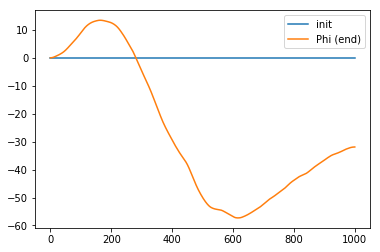

In [186]:
#%%snakeviz
pla = plasma(dT,Nx,Lx,Npart,n,Te,Ti)

Nt = 1000
plt.plot(smooth(pla.phi),label = "init");

for nt in np.arange(Nt):
    if nt%10 == 0 : print("\r t = {:2.4f} over {:2.4f} mu s".format(nt*pla.dT*1e6,Nt*pla.dT*1e6),end="")
    pla.pusher()
    pla.boundary()
    pla.compute_rho()
    pla.solve_poisson()
    
plt.plot(smooth(pla.phi),label = "Phi (end)");

plt.legend()

3e+18 3e+18


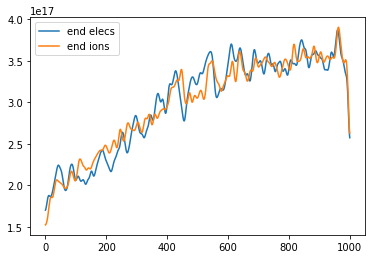

In [187]:
plt.plot(smooth(pla.ne),label = "end elecs");
plt.plot(smooth(pla.ni),label = "end ions");
plt.legend()
print(pla.ne.sum()*Lx,pla.ni.sum()*Lx)

/home/tavant/these/code/venv/stand/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


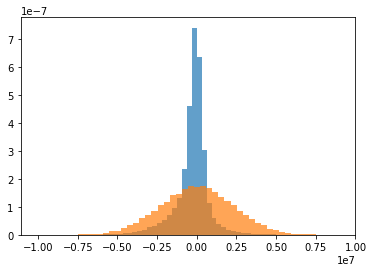

In [178]:
plt.hist(pla.ele.V[:,0],bins=50, alpha = 0.7,normed=True);
pla = plasma(dT,Nx,Lx,Npart,n,Te,Ti)
plt.hist(pla.ele.V[:,0],bins=50, alpha = 0.7,normed=True);



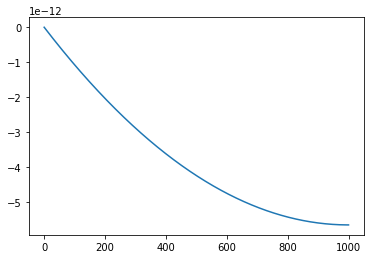

In [86]:
#Generate plasma
pla = plasma(dT,Nx,Lx,Npart,n,Te,Ti)

#fix Electric field profile
#pla.E[:,0] = 45e3*np.exp(-pla.x_j/(5*L_De))
pla.compute_rho()
pla.rho = -np.ones(Nx+1)*1e-18

pla.solve_poisson()
plt.plot(pla.phi)
plt.show()


In [ ]:
plt.hist(pla.ele.V[:,0],label="end",bins=100);
plt.legend()

In [ ]:
pla.compute_rho()
pla.solve_poisson()
print(pla.rho)

In [ ]:
di = pla.rho.copy() / 555
diprim = di.copy()
print(diprim)

In [ ]:
plt.plot(pla.E[:,0])
plt.show()
plt.plot(pla.phi)

In [ ]:
print(diprim)
print(pla.bi)
pla.ai[0] = 0.
print(pla.ai)
print(pla.ci)
ciprim = np.copy(pla.ci) #copy the value, not the reference
ciprim[0] /= pla.bi[0]
for i in np.arange(1,len(ciprim)):
    ciprim[i] /= pla.bi[i] - pla.ai[i]*ciprim[i-1]

pla.ciprim = ciprim
print(pla.ciprim)

In [ ]:
diprim = np.copy(pla.rho)

diprim[0] /= pla.bi[0]
for i in np.arange(1,len(diprim)):
    if pla.ai[i] < 0.5 : print(i)
    diprim[i] -= pla.ai[i]*diprim[i-1]
    diprim[i] /= pla.bi[i] - pla.ai[i]*pla.ciprim[i-1]
    
print(diprim)
pla.phi[0] = 0
pla.phi[-1] = diprim[-1]
#limit conditions
pla.rho[[0,-1]] = 0
for i in np.arange(pla.Nx-1,1,-1):
    pla.phi[i] = diprim[i] - pla.ciprim[i]*pla.phi[i+1]

In [ ]:
plt.plot(pla.phi)

In [ ]:
diprim.copy()